# Traffic Data

### Setup

In [7]:
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import pandas as pd
import os
import datetime
import glob

In [8]:
data_dir = "/Users/robmarty/Dropbox/World Bank/Trainings and Code Resources/LAMATA Workshop 2024/Data"

### Load and explore data

We have a directory of geojsons, each geojson representing one point in time.

In [9]:
os.listdir(os.path.join(data_dir, "Mapbox Traffic", "Raw", "geojson"))

['mb_lagos_2024_05_17_23_13_24_10787.geojson',
 'mb_lagos_2024_05_19_06_31_17_276823.geojson',
 'mb_lagos_2024_05_19_08_32_28_472358.geojson',
 'mb_lagos_2024_05_18_05_17_09_469241.geojson',
 'mb_lagos_2024_05_18_06_17_42_425671.geojson',
 'mb_lagos_2024_05_18_11_20_38_747394.geojson',
 '.DS_Store',
 'mb_lagos_2024_05_17_21_12_04_377724.geojson',
 'mb_lagos_2024_05_18_03_15_58_957032.geojson',
 'mb_lagos_2024_05_18_04_16_34_067956.geojson',
 'mb_lagos_2024_05_19_10_33_34_823526.geojson',
 'mb_lagos_2024_05_18_15_22_45_22747.geojson',
 'mb_lagos_2024_05_19_03_29_41_931922.geojson',
 'mb_lagos_2024_05_18_21_26_17_435254.geojson',
 'mb_lagos_2024_05_19_02_29_07_143706.geojson',
 'mb_lagos_2024_05_19_04_30_10_250924.geojson',
 'mb_lagos_2024_05_19_00_27_55_595537.geojson',
 'mb_lagos_2024_05_17_19_10_20_230233.geojson',
 'mb_lagos_2024_05_18_17_23_55_665648.geojson',
 'mb_lagos_2024_05_18_13_21_49_943754.geojson',
 'mb_lagos_2024_05_18_08_18_54_242081.geojson',
 'mb_lagos_2024_05_19_07_31_

Lets load and explore one of the files

In [11]:
file_i = os.listdir(os.path.join(data_dir, 
                                 "Mapbox Traffic", "Raw", "geojson"))[10]

In [12]:
mp_gdf = gpd.read_file(os.path.join(data_dir,
                                    "Mapbox Traffic", "Raw", "geojson", file_i))

In [13]:
mp_gdf.head()

,class,congestion,structure,datetime,geometry
0,street,low,None,2024-05-19 14:34:17.563000+00:00,"MULTILINESTRING ((3.16751 6.68849, 3.16748 6.6..."
1,street,low,None,2024-05-19 14:34:17.563000+00:00,"MULTILINESTRING ((3.20832 6.70217, 3.20836 6.7..."
2,tertiary,low,None,2024-05-19 14:34:17.563000+00:00,"MULTILINESTRING ((3.19777 6.70717, 3.19762 6.7..."
3,trunk,heavy,None,2024-05-19 14:34:17.563000+00:00,"MULTILINESTRING ((3.22652 6.68887, 3.22649 6.6..."
4,trunk,low,None,2024-05-19 14:34:17.563000+00:00,"MULTILINESTRING ((3.22656 6.68881, 3.22656 6.6..."


In [14]:
# Interactive map doesn't like datetime variable
mp_gdf = mp_gdf.drop(columns = "datetime")

In [15]:
mp_gdf.explore(column = "congestion")

### Add length of road as a variable

In [17]:
mp_gdf['length_km'] = mp_gdf.to_crs(32631).geometry.length / 1000

# Part 1: Analysis across Lagos

### Exercise: Make a histogram of road length

<Axes: xlabel='length_km', ylabel='Count'>

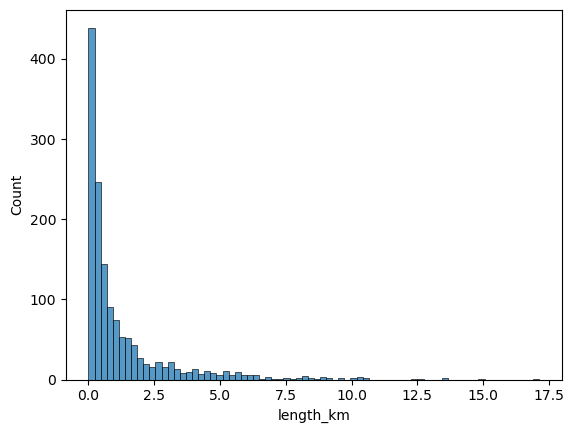

In [18]:
sns.histplot(data = mp_gdf, x = "length_km")

### Exercise: Determine length of congestion by congestion type

__Hint__
1. Group by `congestion`
2. Take sum of `length_km`

### Exercise: Make a figure showing length of congestion for each road class

__Hint__
1. Group by `['congestion', 'class']`
2. Take sum of `length_km`
3. Make plot facetting by `class`; below shows the structure for a facet plot

```python
g = sns.FacetGrid(DATASET, col='FACET-VAR', col_wrap=4, height=4, aspect=1)
g.map(sns.barplot, 'X-VAR', 'Y-VAR')
```

### Make a dataset appending all geojsons together

In [20]:
# Initialize an empty list to hold the dataframes
dataframes = []

# List of geojsons
geojson_files = glob.glob(os.path.join(data_dir, 
                                       "Mapbox Traffic", "Raw", 
                                       "geojson", 
                                       '*.geojson'))

# Loop through the list of geojsons files and read each one into a dataframe
for file_i in geojson_files:
    df = gpd.read_file(file_i)
    dataframes.append(df)

# Concatenate all dataframes in the list into a single dataframe
mp_all_gdf = pd.concat(dataframes, ignore_index=True)

In [21]:
mp_all_gdf.shape

(50866, 5)

In [22]:
mp_all_gdf.head()

,class,congestion,structure,datetime,geometry
0,street,low,None,2024-05-18 03:14:05.467000+00:00,"MULTILINESTRING ((3.16751 6.68849, 3.16748 6.6..."
1,street,low,None,2024-05-18 03:14:05.467000+00:00,"MULTILINESTRING ((3.20832 6.70217, 3.20836 6.7..."
2,tertiary,low,None,2024-05-18 03:14:05.467000+00:00,"MULTILINESTRING ((3.19777 6.70717, 3.19762 6.7..."
3,trunk,low,None,2024-05-18 03:14:05.467000+00:00,"MULTILINESTRING ((3.22642 6.68881, 3.22635 6.6..."
4,secondary,low,None,2024-05-18 03:14:05.467000+00:00,"MULTILINESTRING ((3.22651 6.68873, 3.22654 6.6..."


#### Floor datetime

In [23]:
mp_all_gdf['datetime'] = mp_all_gdf['datetime'].dt.floor('h')
mp_all_gdf.head()

,class,congestion,structure,datetime,geometry
0,street,low,None,2024-05-18 03:00:00+00:00,"MULTILINESTRING ((3.16751 6.68849, 3.16748 6.6..."
1,street,low,None,2024-05-18 03:00:00+00:00,"MULTILINESTRING ((3.20832 6.70217, 3.20836 6.7..."
2,tertiary,low,None,2024-05-18 03:00:00+00:00,"MULTILINESTRING ((3.19777 6.70717, 3.19762 6.7..."
3,trunk,low,None,2024-05-18 03:00:00+00:00,"MULTILINESTRING ((3.22642 6.68881, 3.22635 6.6..."
4,secondary,low,None,2024-05-18 03:00:00+00:00,"MULTILINESTRING ((3.22651 6.68873, 3.22654 6.6..."


#### Add length of road as a variable

In [24]:
mp_all_gdf['length_km'] = mp_all_gdf.to_crs(32631).geometry.length / 1000

### Exercise: Plot trends in each category of congestion over time

__Hint__
1. Group by `['congestion', 'datetime']`
2. Take sum of `length_km`
3. Make a plot facetting by `congestion`, with `datetime` on the x axis and `length_km` on the y axis

### Exercise: Plot trends in each category of congestion by hour
1. Group by `['congestion', 'hour']`
2. Take __average__ of `length_km`
3. 3. Make a plot facetting by `congestion`, with `hour` on the x axis and `length_km` on the y axis

### Exercise: Which ADM2 units had the most congestion at 5pm on May 18th?


In [27]:
# Load ADM2 File
nga2_gdf = gpd.read_file(os.path.join(data_dir, 'GADM', 'Raw', 'lagos_adm2.geojson'))

In [35]:
# Filter to May 18th ad 5pm
mp_all_gdf_i = mp_all_gdf[mp_all_gdf.datetime == "2024-05-18 17:00:00+00:00"]

# Make geometry the centroid of the route
mp_all_gdf_i['geometry'] = mp_all_gdf_i.centroid

/var/folders/m1/8h14xfm56hd6qfgz6btm1rd80000gn/T/ipykernel_75869/887343189.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mp_all_gdf_i['geometry'] = mp_all_gdf_i.centroid
/Users/robmarty/miniforge3/envs/ox/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


For the rest of the code:
1. Spatially join data from `nga2_gdf` to `mp_all_gdf_i`. Example code. DATASET1.sjoin(DATASET2)`
2. Aggregate data by `['congestion', 'NAME_2']`, calculating sum of `length_km` for each group
3. Pivot this dataframe so that congestion types are variables. The __index__ should be `NAME_2`, __columns__ should be `congestion`, and __values__ should be `length_km`. Below shows example code for pivoting:

```python
DATASET.pivot(index = "INDEX-VAR",
              columns = "COLUMN-VAR",
              values = "VALUE_VAR").reset_index()
```

4. Merge above dataset onto `nga2_gdf`; merge on `NAME_2` variable
5. Make a mape of the `heavy` variable.